<a href="https://colab.research.google.com/github/am-eric/Cousera-projects/blob/main/Naive_Bayes_Email_Spam_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align=center>Naive Bayes<h1>

---

Based on Bayes Theorem.

**Naive** : Assumes the occurence of a certain feature is independent to the occurence of other features.

**Bayes Theorem/ Law**

P(A | B) = P(B | A) * P(A) / P(B)



Where:
- P(A | B) is the posterior probability of class A given features B.
- P(B | A) is the likelihood of features B given class A.
- P(A) is the prior probability of class A.
- P(B) is the probability of features B.



Now lets predict if an Email is Spam or not

---

### Step 1: Load the Dataset

In [21]:
import pandas as pd


In [22]:
# Read the data from a CSV file
df = pd.read_csv("spamsms-1.csv", encoding="iso-8859-1")
df.head()

type                                               text
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [24]:
df.isna()

type   text
0     False  False
1     False  False
2     False  False
3     False  False
4     False  False
...     ...    ...
5567  False  False
5568  False  False
5569  False  False
5570  False  False
5571  False  False

[5572 rows x 2 columns]

In [25]:
#remove duplicates if any
df = df.drop_duplicates()

In [26]:
df.shape

(5169, 2)

###Step 2: Label encoder to change text to numerals

In [27]:
# label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df['type'])

LabelEncoder()

In [28]:
df['type'] = le.transform(df['type'])

In [29]:
df['type']

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: type, Length: 5169, dtype: int64

 ham = 0

 spam = 1

 ---

Count the type labels and plot

In [30]:
type_count = df.type.value_counts()
type_count

0    4516
1     653
Name: type, dtype: int64

### Step 3: Visualize the plot

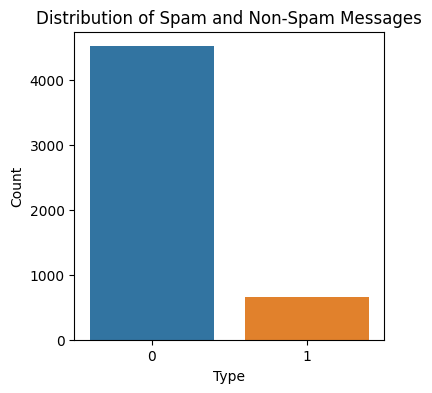

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(4,4))
ax = sns.countplot(data=df, x='type')

plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Distribution of Spam and Non-Spam Messages')
plt.show()



In [32]:
print('There are {} spam messages.'.format(len(df[df['type'] == 1])))

There are 653 spam messages.


In [33]:
print('There are {} non-spam messages.'.format(len(df[df['type'] == 0])))

There are 4516 non-spam messages.


### Step 4:Pre-process the text data

In [34]:
def preprocess_text(message):
  # Convert all characters to lowercase
  message = message.lower()

  # Remove punctuation
  import string
  message = message.translate(str.maketrans('', '', string.punctuation))

  # Tokenize the message into words
  words = message.split()

  # remove stopwords
  import nltk
  from nltk.corpus import stopwords
  nltk.download('stopwords')
  words = [word for word in words if word not in stopwords.words('english')]

  # Join the words back into a string
  processed_message = ' '.join(words)

  return processed_message

df['text'].apply(preprocess_text).head(2)



Streaming output truncated to the last 5000 lines.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-dat

0    go jurong point crazy available bugis n great ...
1                              ok lar joking wif u oni
Name: text, dtype: object

### Step 5: Prepare Train and Test Data

In [35]:
X = df['text']
y = df['type']



In [36]:
# TF-IDF (Term Frequency-Inverse Document Frequency) vectorization technique.
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X = tfidf_vectorizer.fit_transform(X)
y = df['type']

In [37]:
# split data into train and test
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test, = train_test_split(X,y, test_size=0.3, random_state=42)

In [38]:
# Model training
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train,y_train)


MultinomialNB()

### Step 6: Model Evaluation

In [39]:
# Model Evaluation
from sklearn.metrics import accuracy_score, classification_report
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [40]:
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Accuracy: 0.9613152804642167
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1331
           1       1.00      0.73      0.84       220

    accuracy                           0.96      1551
   macro avg       0.98      0.86      0.91      1551
weighted avg       0.96      0.96      0.96      1551



The model has an Accuracy of 0.96 which is pretty good 💪

Lets write a function that takes input from user to predict if it is spam or not.

In [49]:
def pred(message):
    processed_message = preprocess_text(message)  # Preprocess the message
    prediction = model.predict(processed_message)  # Predict using the model

    if prediction[0] == 0:
        print('This message is not a spam.')
    else:
        print('This message is a spam.')

user_input = input('Write text here: ')
pred(user_input)


Write text here: help me


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


ValueError: ignored